In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics

import nbimporter
from sklearn.metrics import silhouette_samples, silhouette_score

from preprocessamento import *
from geracaoDeTabelas import gerar_todos_os_graficos
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA, LatentDirichletAllocation as LDA

from mpl_toolkits import mplot3d

Importing Jupyter notebook from preprocessamento.ipynb
Importing Jupyter notebook from geracaoDeTabelas.ipynb


In [5]:
dados_2015 = pd.read_csv('../arquivos/2015.csv')
dados_2016 = pd.read_csv('../arquivos/2016.csv')

In [6]:
dados_2016['nao_mudaria_de_curso'].value_counts()

Verifica-se sempre            90
Verifica-se com frequência    64
Poucas vezes se verifica      61
Nunca se verifica             22
Name: nao_mudaria_de_curso, dtype: int64

In [7]:
y_2015 = gerar_target(dados_2015)
y_2016 = gerar_target(dados_2016)

y = pd.concat([y_2015, y_2016])

In [8]:
df_2015 = preprocessar(dados_2015)
df_2016 = preprocessar(dados_2016)

frames = [df_2015, df_2016]

data_frame = pd.concat(frames)

In [6]:
df_2016

,filhos,afinidade_linguagens,afinidade_humanas,afinidade_matematica,afinidade_natureza,motivacao_curso,tarefa_durante_curso,realizacao_profissional,concluir_curso_nessa_instituicao,nao_mudaria_de_curso
0,0,2,2,3,3,3,3,3,3,3
1,0,1,2,1,1,2,1,2,3,2
2,0,1,2,2,3,3,2,3,3,3
3,0,1,1,3,0,3,2,3,3,1
4,0,3,2,3,2,3,1,3,3,3
5,0,1,2,2,3,2,1,2,1,0
6,0,2,3,2,2,2,1,2,3,3
7,0,0,1,1,2,1,2,2,3,3
8,0,2,3,3,3,3,0,3,3,3
9,0,1,2,2,2,3,2,3,3,3


For n_clusters = 2 The average silhouette_score is : 0.22813876297334187


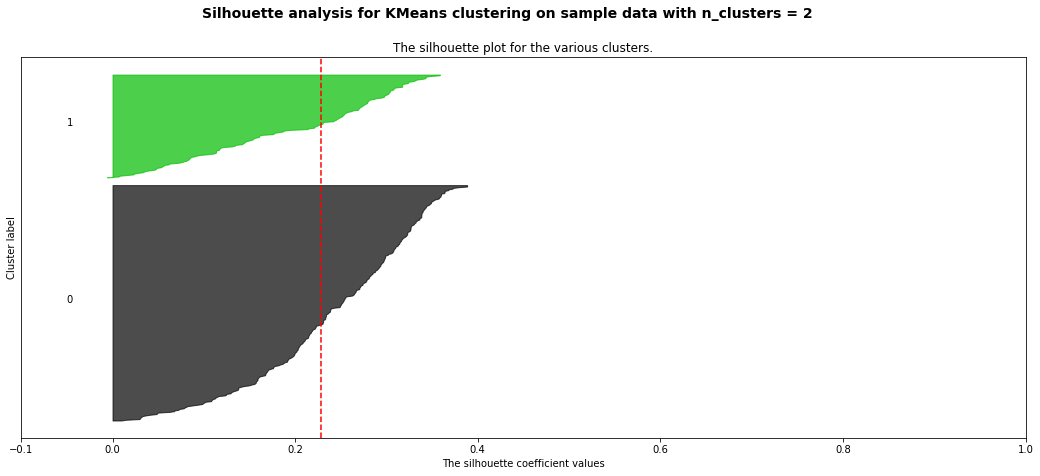

For n_clusters = 3 The average silhouette_score is : 0.1574329889921733


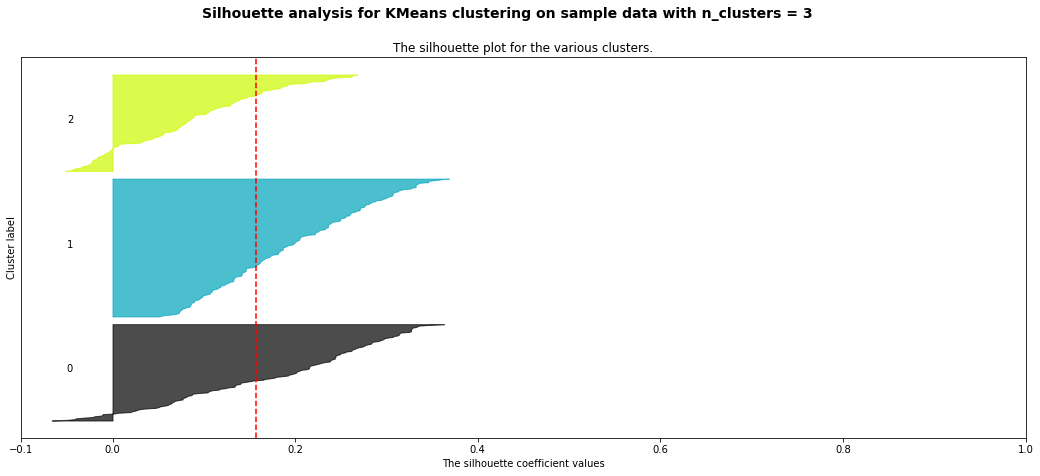

For n_clusters = 4 The average silhouette_score is : 0.15266867606119217


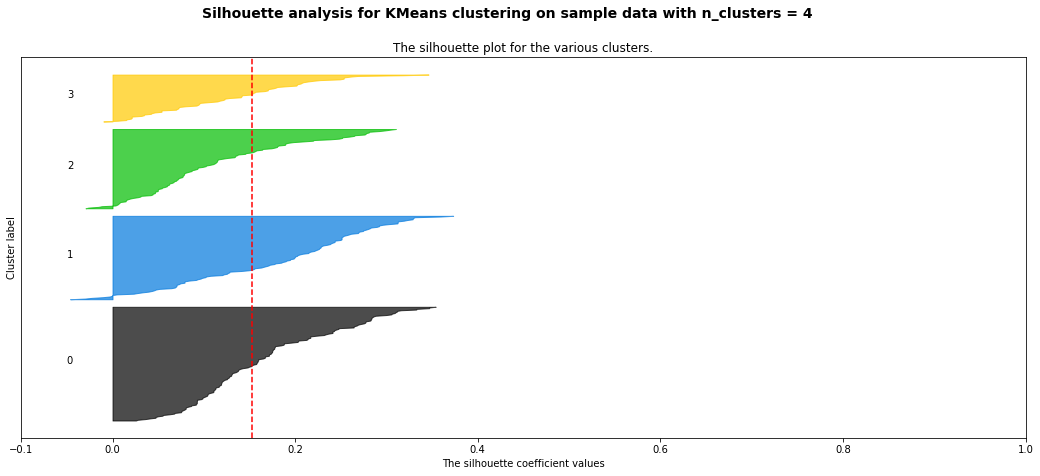

For n_clusters = 5 The average silhouette_score is : 0.13413941710081143


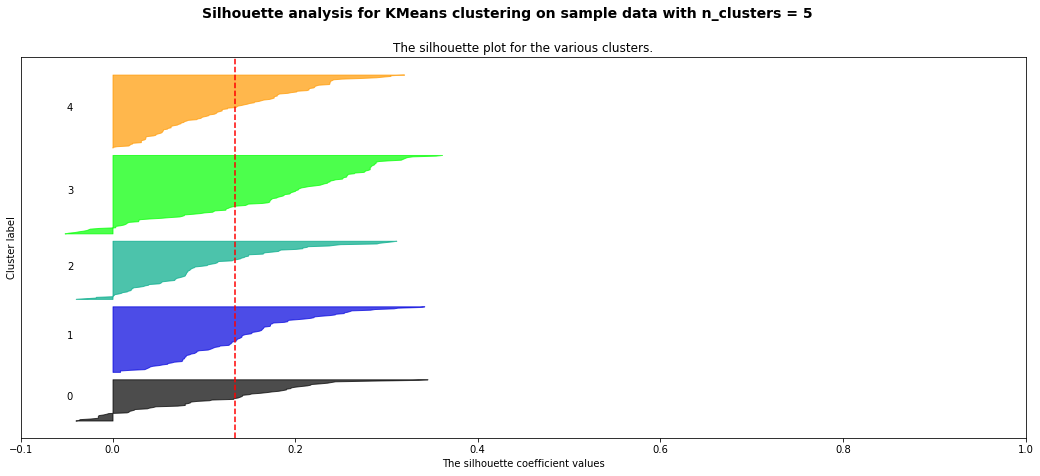

For n_clusters = 6 The average silhouette_score is : 0.1337278203817116


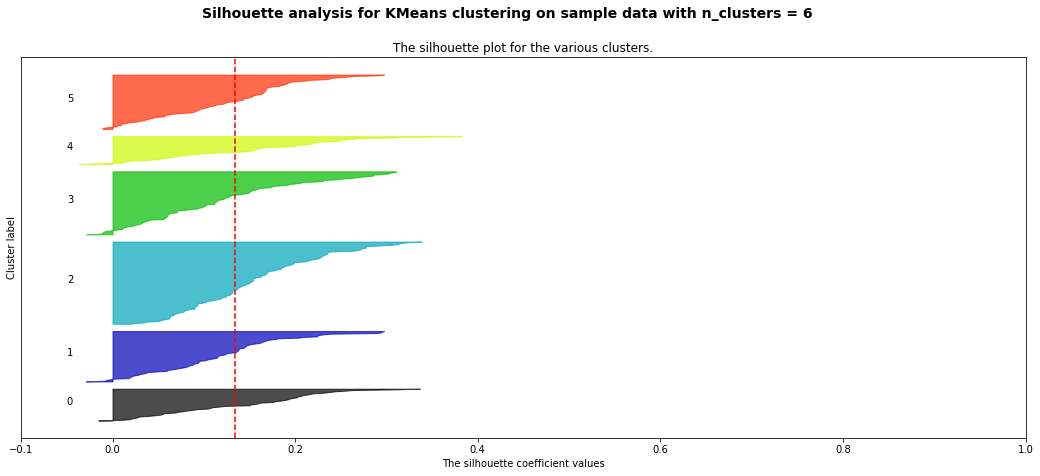

For n_clusters = 7 The average silhouette_score is : 0.12079179463672292


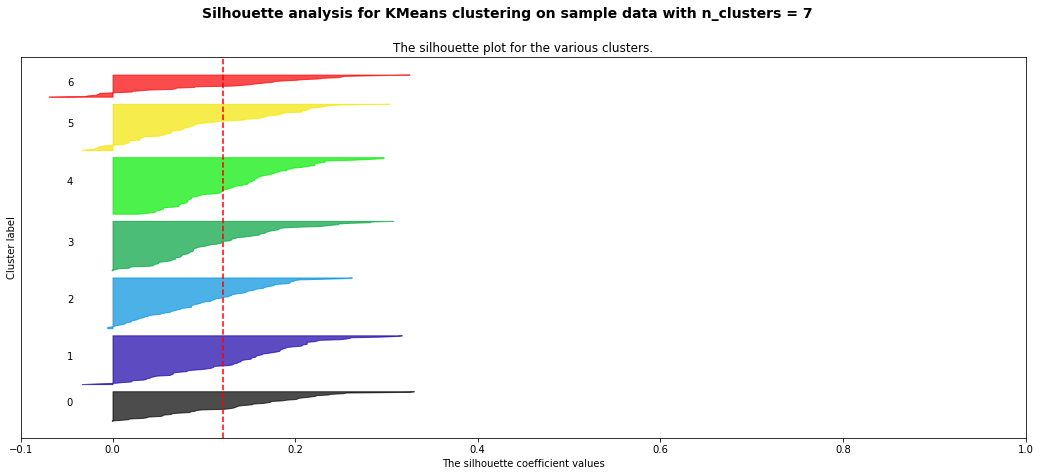

For n_clusters = 8 The average silhouette_score is : 0.12845081998481347


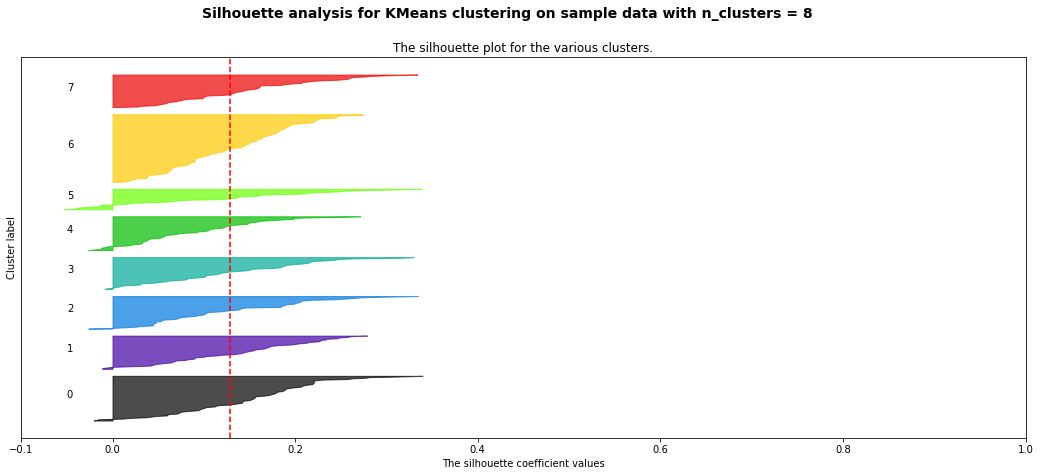

For n_clusters = 9 The average silhouette_score is : 0.12102622821754502


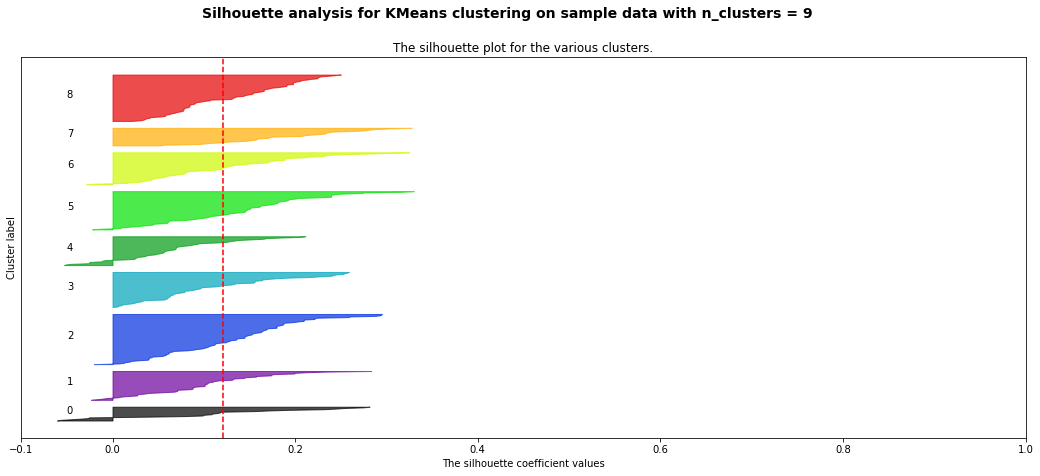

For n_clusters = 10 The average silhouette_score is : 0.12292650795617774


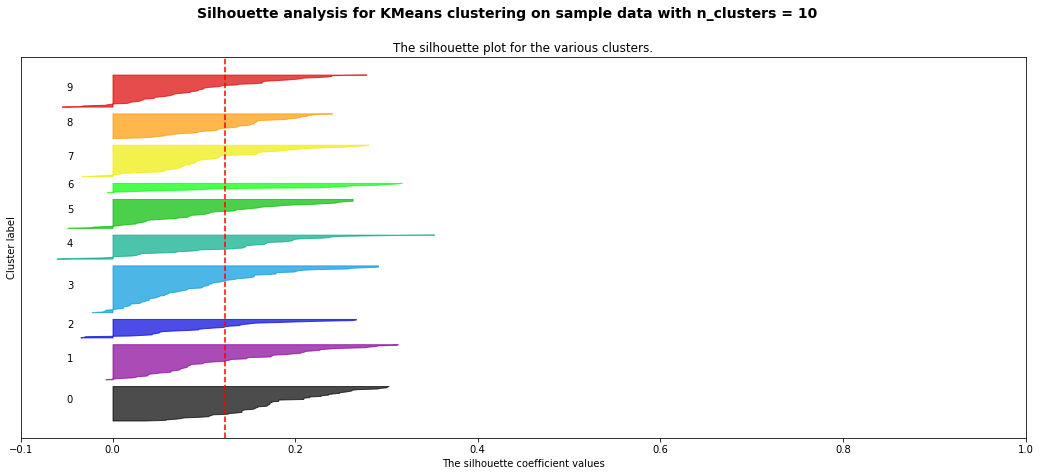

In [4]:
n_clusters = [2,3,4,5,6,7,8,9,10]

modelos_kmeans = 10

for n_cluster in n_clusters:
    # cria um plot
    fig, ax1 = plt.subplots(1)
    fig.set_size_inches(18, 7)
    
    # define até onde o gráfico vai
    ax1.set_xlim([-0.1, 1])
    
    # inicializa o cluster com k = n_clusters
    clusterer = KMeans(n_clusters=n_cluster,
                       init='k-means++', 
                       n_init=10, 
                       max_iter=300, 
                       random_state=0)
    
    cluster_labels = clusterer.fit_predict(data_frame)
    
    # O silhouette_score nos dá um valor média para todos os clusteres
    silhouette_avg = silhouette_score(data_frame, cluster_labels)
    print("For n_clusters =", n_cluster,
          "The average silhouette_score is :", silhouette_avg)
    
    # calcula os valores de cada objetivo
    sample_silhouette_values = silhouette_samples(data_frame, cluster_labels)
    y_lower = 10
    for i in range(n_cluster):
        # junta os silhouette scores para todos os elementos dentro do cluster i
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.nipy_spectral(float(i) / n_cluster)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        
        
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10  # 10 for the 0 samples
        
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_cluster),
                 fontsize=14, fontweight='bold')

    plt.show()

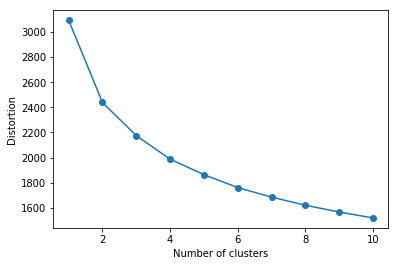

In [5]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(data_frame)
    distortions.append(km.inertia_)
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

### DBSCAN

In [9]:
data_frame.shape

(473, 10)

In [10]:
X = normalize(data_frame)

Numero de cluster: 5


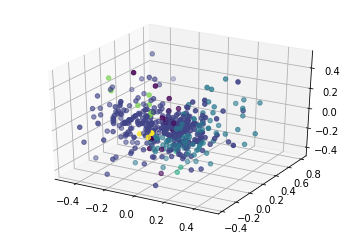

In [11]:
pca = PCA(n_components=3, random_state=42)
X_train_pca  =  pca.fit_transform(X)

dbscan = DBSCAN(eps=0.02, min_samples=3, metric='cosine')
dbscan.fit(X_train_pca)
labels = dbscan.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print('Numero de cluster: {}'.format( n_clusters_))

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(X_train_pca[:,0:1], X_train_pca[:,1:2], X_train_pca[:,2:3], c=labels);

/home/igor/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


Numero de cluster: 3


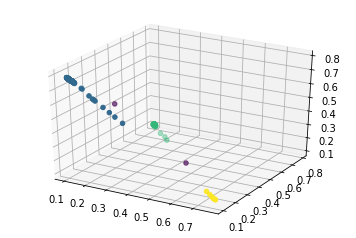

In [12]:
lda = LDA(n_components=3,random_state=42)
X_train_lda = lda.fit_transform(X, y)

dbscan = DBSCAN(eps=0.02, min_samples=3, metric='cosine')
dbscan.fit(X_train_lda)
labels = dbscan.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print('Numero de cluster: {}'.format( n_clusters_))

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(X_train_lda[:,0:1], X_train_lda[:,1:2], X_train_lda[:,2:3], c=labels);

In [13]:
data_frame['cluster_id'] = labels
data_frame['label'] = y

In [14]:
cluster_0 = data_frame[data_frame['cluster_id'] == 0]
cluster_1 = data_frame[data_frame['cluster_id'] == 1]
cluster_2 = data_frame[data_frame['cluster_id'] == 2]
outlier = data_frame[data_frame['cluster_id'] == -1]

In [15]:
cluster_0['nao_mudaria_de_curso'].value_counts()

4    175
3     56
2     42
1     27
0      5
Name: nao_mudaria_de_curso, dtype: int64

In [16]:
cluster_0.describe()

,filhos,afinidade_linguagens,afinidade_humanas,afinidade_matematica,afinidade_natureza,motivacao_curso,tarefa_durante_curso,realizacao_profissional,concluir_curso_nessa_instituicao,nao_mudaria_de_curso,cluster_id,label
count,305.00000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.000000,305.0,305.000000
mean,0.02623,1.416393,1.596721,2.331148,1.777049,2.245902,1.472131,2.213115,2.488525,3.209836,0.0,0.855738
std,0.16008,0.761141,0.801718,0.662814,0.775529,0.689578,0.707137,0.690984,0.702931,1.083019,0.0,0.351933
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,0.00000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,3.000000,0.0,1.000000
50%,0.00000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,3.000000,4.000000,0.0,1.000000
75%,0.00000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,4.000000,0.0,1.000000
max,1.00000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,0.0,1.000000


In [17]:
cluster_1.describe()

,filhos,afinidade_linguagens,afinidade_humanas,afinidade_matematica,afinidade_natureza,motivacao_curso,tarefa_durante_curso,realizacao_profissional,concluir_curso_nessa_instituicao,nao_mudaria_de_curso,cluster_id,label
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.0,159.000000
mean,0.018868,2.232704,2.226415,1.106918,1.364780,2.025157,1.433962,2.100629,2.358491,2.584906,1.0,0.798742
std,0.136488,0.657912,0.655305,0.776157,0.859948,0.711120,0.600931,0.805008,0.880758,1.406593,0.0,0.402207
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,2.000000,2.000000,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.0,1.000000
50%,0.000000,2.000000,2.000000,1.000000,1.000000,2.000000,1.000000,2.000000,3.000000,3.000000,1.0,1.000000
75%,0.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,4.000000,1.0,1.000000
max,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,1.0,1.000000


In [18]:
cluster_2.describe()

,filhos,afinidade_linguagens,afinidade_humanas,afinidade_matematica,afinidade_natureza,motivacao_curso,tarefa_durante_curso,realizacao_profissional,concluir_curso_nessa_instituicao,nao_mudaria_de_curso,cluster_id,label
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.00000,7.0,7.0
mean,0.714286,0.714286,1.142857,0.857143,1.428571,2.285714,0.714286,2.285714,2.857143,1.00000,2.0,1.0
std,0.487950,0.951190,0.690066,0.899735,0.975900,0.487950,0.487950,0.487950,0.377964,0.57735,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000,2.000000,0.00000,2.0,1.0
25%,0.500000,0.000000,1.000000,0.000000,1.000000,2.000000,0.500000,2.000000,3.000000,1.00000,2.0,1.0
50%,1.000000,0.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,3.000000,1.00000,2.0,1.0
75%,1.000000,1.500000,1.500000,1.500000,2.000000,2.500000,1.000000,2.500000,3.000000,1.00000,2.0,1.0
max,1.000000,2.000000,2.000000,2.000000,3.000000,3.000000,1.000000,3.000000,3.000000,2.00000,2.0,1.0


In [19]:
outlier.describe()

,filhos,afinidade_linguagens,afinidade_humanas,afinidade_matematica,afinidade_natureza,motivacao_curso,tarefa_durante_curso,realizacao_profissional,concluir_curso_nessa_instituicao,nao_mudaria_de_curso,cluster_id,label
count,2.000000,2.0,2.000000,2.0,2.000000,2.0,2.0,2.000000,2.000000,2.000000,2.0,2.0
mean,0.500000,2.0,1.500000,1.0,1.500000,2.0,1.0,2.500000,2.500000,3.000000,-1.0,1.0
std,0.707107,0.0,0.707107,0.0,0.707107,0.0,0.0,0.707107,0.707107,1.414214,0.0,0.0
min,0.000000,2.0,1.000000,1.0,1.000000,2.0,1.0,2.000000,2.000000,2.000000,-1.0,1.0
25%,0.250000,2.0,1.250000,1.0,1.250000,2.0,1.0,2.250000,2.250000,2.500000,-1.0,1.0
50%,0.500000,2.0,1.500000,1.0,1.500000,2.0,1.0,2.500000,2.500000,3.000000,-1.0,1.0
75%,0.750000,2.0,1.750000,1.0,1.750000,2.0,1.0,2.750000,2.750000,3.500000,-1.0,1.0
max,1.000000,2.0,2.000000,1.0,2.000000,2.0,1.0,3.000000,3.000000,4.000000,-1.0,1.0


In [35]:
colunas = ['Tem filhos?', 'Afinidade com Linguagens, códigos e suas tecnologias.','Afinidade com Ciências humanas e suas tecnologias.',
           'Afinidade com Matemática e suas tecnologias.', 'Afinidade com Ciências da natureza e suas tecnologias.',
           'Como você avalia sua motivação em relação ao curso que escolheu?', 
           'O quanto você conhece as As atividades e tarefas exercidas durante o curso.', 'Julga que o teu curso permitirá lhe  realizar profissionalmente?',
           'Pretende concluir seu curso nesta instituição?', 'Mesmo que pudesse, mudaria de curso?']

In [36]:
len(colunas)

10

In [47]:
def gerar_graficos(dados, coluna, titulo, cluster):
    data = dados[coluna].value_counts()
    data.plot(kind='barh', title=titulo,figsize=(10, 9))
    plt.savefig('../imagens/2015_2016/'+ cluster + '/' + titulo)

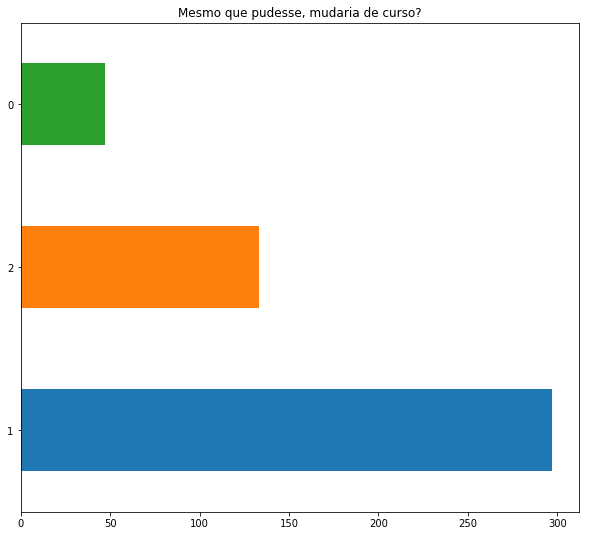

In [51]:
for i in range(10):
    gerar_graficos(cluster_0, cluster_1.columns[i], colunas[i],'cluster_0')
    gerar_graficos(cluster_1, cluster_1.columns[i], colunas[i],'cluster_1')
    gerar_graficos(cluster_2, cluster_1.columns[i], colunas[i],'cluster_2')